In [20]:
library(ggplot2)

# 1번

중학교 2학년 학생 중에서 15명을 임의로 추출하여 각 학생의 약력(kg), 신장(cm), 체중(kg)과 원반던지기에서 던진 거리(m)를 측정하여 다음의 데이터를 얻었다. 다음 물음에 답하여라. (R을 이용하여 풀이)(검정에서는
유의수준 α = 0.05 사용)

|학생번호|x1(약력)|x2(신장)|x3(체중)|y(원반던지기 거리)|
|--|--|--|--|--|
|1|28|146|34|22|
|2|47|169|57|36|
|3|39|160|38|24|
|4|25|156|28|22|
|5|34|161|37|27|
|6|29|168|50|29|
|7|38|154|54|26|
|8|23|153|40|23|
|9|52|160|62|31|
|10|37|152|39|25|
|11|35|155|46|23|
|12|39|154|54|27|
|13|38|157|57|31|
|14|32|162|53|25|
|15|25|142|32|23|


In [29]:
dt <- data.frame(x1 = c(28,47,39,25,34,29,38,23,52,37,35,39,38,32,25),
                 x2 = c(146,169,160,156,161,168,154,153,160,152,155,154,157,162,142),
                 x3 = c(34,57,38,28,37,50,54,40,62,39,46,54,57,53,32),
 y = c(22,36,24,22,27,29,26,23,31,25,23,27,31,25,23))

## (1)

$x_3$를 설명변수로 하고 $y$를 반응변수로 하여 회귀직선을 적합시키고, 이상치가 있는가, 어떤 것이 영향을 크게 주는 측정값인가를 판정하시오.

In [18]:
model1 <- lm(y~x3,dt)
summary(model1)


Call:
lm(formula = y ~ x3, data = dt)

Residuals:
   Min     1Q Median     3Q    Max 
-3.453 -1.727 -0.042  1.068  6.396 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.20655    3.15279   4.189 0.001061 ** 
x3           0.28767    0.06774   4.247 0.000953 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.692 on 13 degrees of freedom
Multiple R-squared:  0.5811,	Adjusted R-squared:  0.5489 
F-statistic: 18.04 on 1 and 13 DF,  p-value: 0.0009527


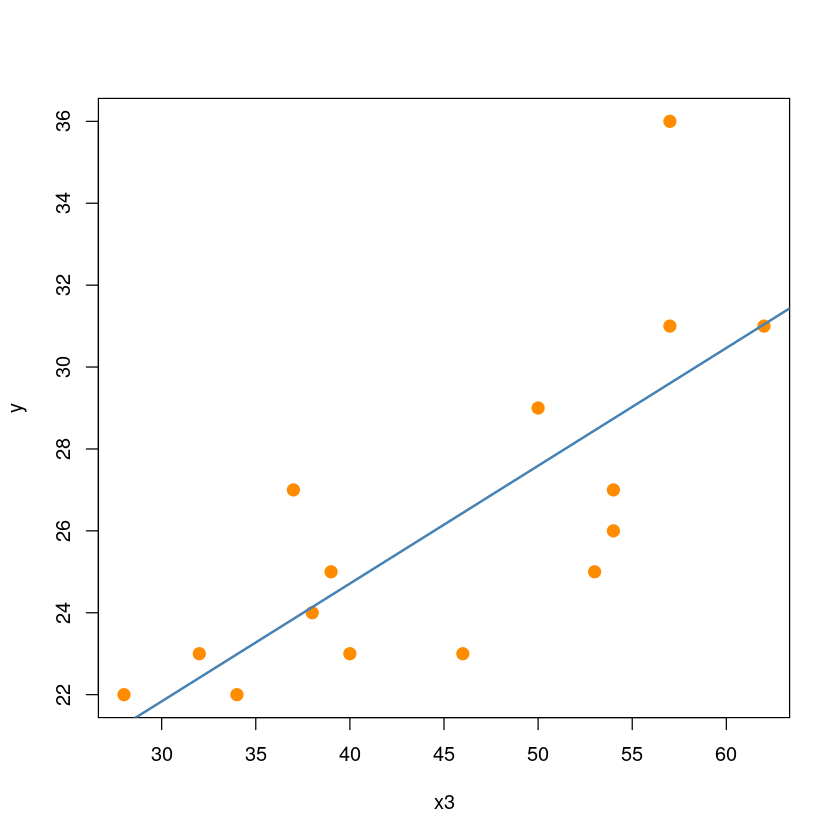

In [26]:
plot(y~x3, dt,pch = 20,cex = 2,col = "darkorange")
abline(model1, col='steelblue', lwd=2)

### leverage

- Hmatrix

In [72]:
X = cbind(rep(1, nrow(dt)), dt$x3)
H = X %*% solve(t(X) %*% X) %*% t(X)
diag(H)

[1] 0.14894066 0.15185279 0.10133367 0.25833544 0.11133620 0.08006246
 [7] 0.11348865 0.08512704 0.24111589 0.09259728 0.06689457 0.11348865
[13] 0.15185279 0.10323289 0.18034101

- hatvalues 함수

In [127]:
which.max(hatvalues(model1))
hatvalues(model1)[which.max(hatvalues(model1))]

4 
4

4 
0.2583354

In [124]:
2*(1+1)/nrow(dt)

[1] 0.2666667

- $h_{4} < 2\bar h$이므로 leverage포인트로 고려할 점은 없다.

### 이상치

- 잔차

In [75]:
residual <- model1$residuals
head(residual)

1          2          3          4          5          6 
-0.9872542  6.3963873 -0.1379252  0.7387524  3.1497426  1.4100616

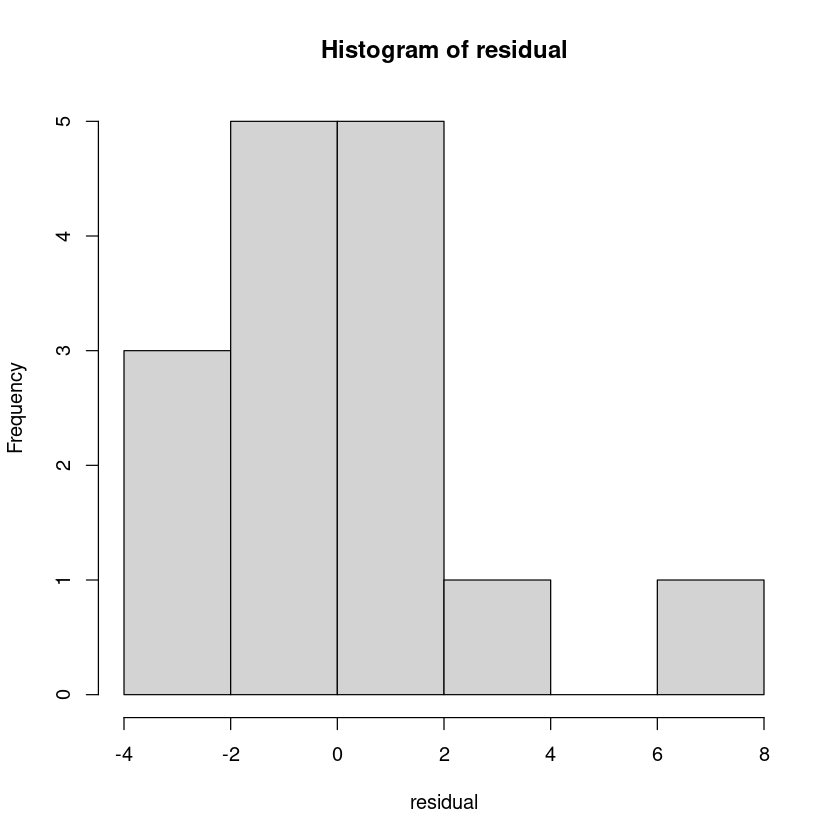

In [76]:
hist(residual)

- 내적표준화된 잔차

In [77]:
s_residual <- rstandard(model1)
head(s_residual)

1           2           3           4           5           6 
-0.39751714  2.57991821 -0.05404447  0.31864123  1.24111813  0.54609189

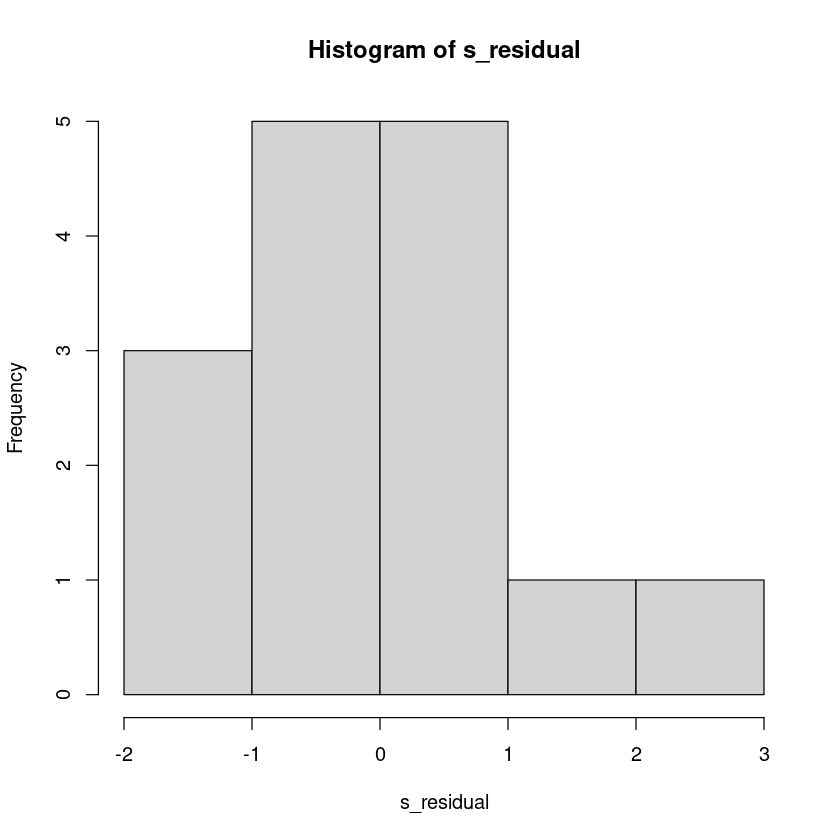

In [168]:
hist(s_residual)

In [132]:
s_residual>2

1     2     3     4     5     6     7     8     9    10    11    12    13 
FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
   14    15 
FALSE FALSE

- 외적표준화된 잔차

In [78]:
s_residual_i <- rstudent(model1)
head(s_residual_i)

1           2           3           4           5           6 
-0.38426469  3.54825007 -0.05193008  0.30734314  1.27004329  0.53079154

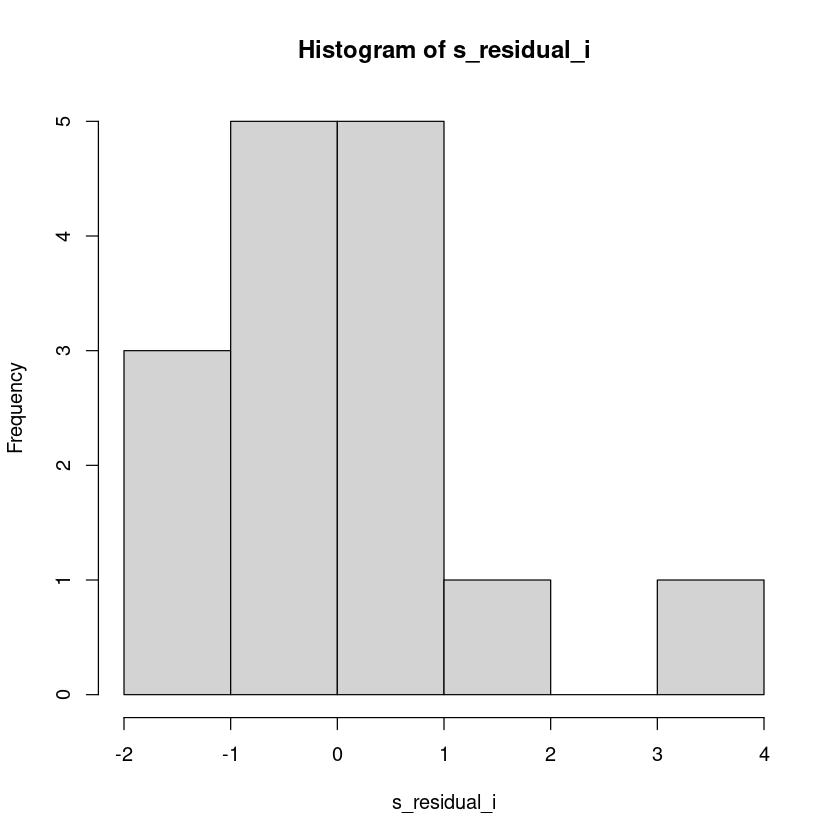

In [79]:
hist(s_residual_i)

In [169]:
which.max(s_residual_i)
s_residual_i[which.max(s_residual_i)]

2 
2

2 
3.54825

In [170]:
qt(0.975, 15-1-2)

[1] 2.178813

- $|r_i^*| \geq t_{\alpha/2}(12)$ 이므로 2번째 관측값은 유의수준 0.05에서 이상점이다.

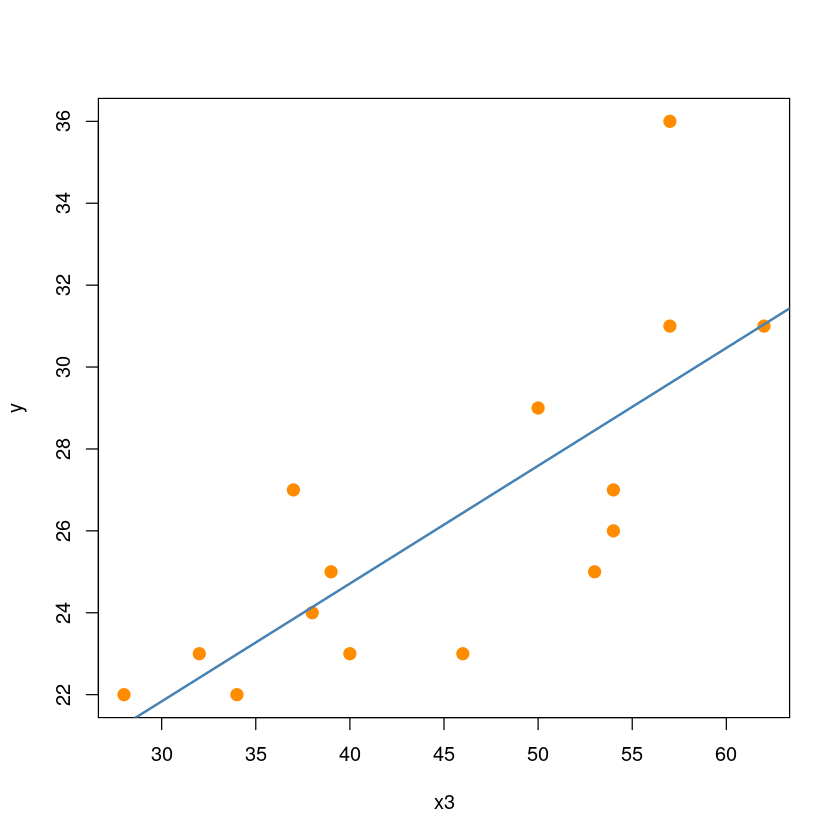

In [141]:
plot(y~x3, dt,pch = 20,cex = 2,col = "darkorange")
abline(model1, col='steelblue', lwd=2)

### 영향점

In [142]:
influence(model1)

,(Intercept),x3
1,-0.45742205,0.0083719544
2,-2.01160268,0.0553827321
3,-0.04287451,0.0007190015
4,0.56454256,-0.0109721950
5,1.09199851,-0.0188481935
6,-0.10046455,0.0044636533
7,0.55803792,-0.0168311648
8,-0.41549161,0.0064019062
9,0.02268944,-0.0005809430
10,0.15864320,-0.0025647941


In [88]:
influence.measures(model1)

Influence measures of
	 lm(formula = y ~ x3, data = dt) :

     dfb.1_   dfb.x3    dffit cov.r   cook.d    hat inf
1  -0.14025  0.11948 -0.16075 1.346 1.38e-02 0.1489    
2  -0.87752  1.12451  1.50138 0.330 5.96e-01 0.1519   *
3  -0.01307  0.01020 -0.01744 1.305 1.65e-04 0.1013    
4   0.17271 -0.15624  0.18139 1.558 1.77e-02 0.2583   *
5   0.35443 -0.28474  0.44954 1.026 9.65e-02 0.1113    
6  -0.03097  0.06405  0.15659 1.218 1.30e-02 0.0801    
7   0.17826 -0.25025 -0.38961 1.096 7.48e-02 0.1135    
8  -0.12883  0.09239 -0.19840 1.197 2.06e-02 0.0851    
9   0.00691 -0.00824 -0.00969 1.546 5.08e-05 0.2411   *
10  0.04844 -0.03645  0.06888 1.283 2.56e-03 0.0926    
11 -0.05967 -0.02135 -0.36571 0.942 6.27e-02 0.0669    
12  0.11002 -0.15445 -0.24046 1.230 3.02e-02 0.1135    
13 -0.13549  0.17362  0.23181 1.317 2.84e-02 0.1519    
14  0.19215 -0.28354 -0.47641 0.965 1.06e-01 0.1032    
15  0.09900 -0.08652  0.10898 1.419 6.40e-03 0.1803    

- DFFITS

In [89]:
dffits(model1) 

1            2            3            4            5            6 
-0.160752301  1.501377795 -0.017437998  0.181389340  0.449539631  0.156588296 
           7            8            9           10           11           12 
-0.389606513 -0.198401773 -0.009687608  0.068878582 -0.365708005 -0.240459577 
          13           14           15 
 0.231812126 -0.476405219  0.108981268

In [90]:
which(abs(dffits(model1)) > 2*sqrt(2/(15-2)))

2 
2

- Cook's Distance

In [162]:
cooks.distance(model1)

1            2            3            4            5            6 
1.382723e-02 5.958452e-01 1.646750e-04 1.768277e-02 9.649286e-02 1.297693e-02 
           7            8            9           10           11           12 
7.482759e-02 2.059570e-02 5.083403e-05 2.559889e-03 6.269674e-02 3.018353e-02 
          13           14           15 
2.839721e-02 1.055895e-01 6.404520e-03

In [163]:
qf(0.5,2,15-2)

[1] 0.7314546

In [164]:
which(cooks.distance(model1) >qf(0.5,2,15-2))

named integer(0)

없다

- COVRATIO

In [165]:
covratio(model1)

1         2         3         4         5         6         7         8 
1.3456795 0.3295305 1.3053608 1.5577804 1.0262210 1.2178915 1.0964638 1.1969333 
        9        10        11        12        13        14        15 
1.5464197 1.2834102 0.9420659 1.2295539 1.3170295 0.9654192 1.4190330

In [166]:
which(abs(covratio(model1)-1) > 3*(1+1)/15)

2  4  9 15 
 2  4  9 15

In [167]:
summary(influence.measures(model1))

Potentially influential observations of
	 lm(formula = y ~ x3, data = dt) :

  dfb.1_ dfb.x3  dffit   cov.r   cook.d hat  
2 -0.88   1.12_*  1.50_*  0.33_*  0.60   0.15
4  0.17  -0.16    0.18    1.56_*  0.02   0.26
9  0.01  -0.01   -0.01    1.55_*  0.00   0.24


- 영향점은 2번째 관측값이다.

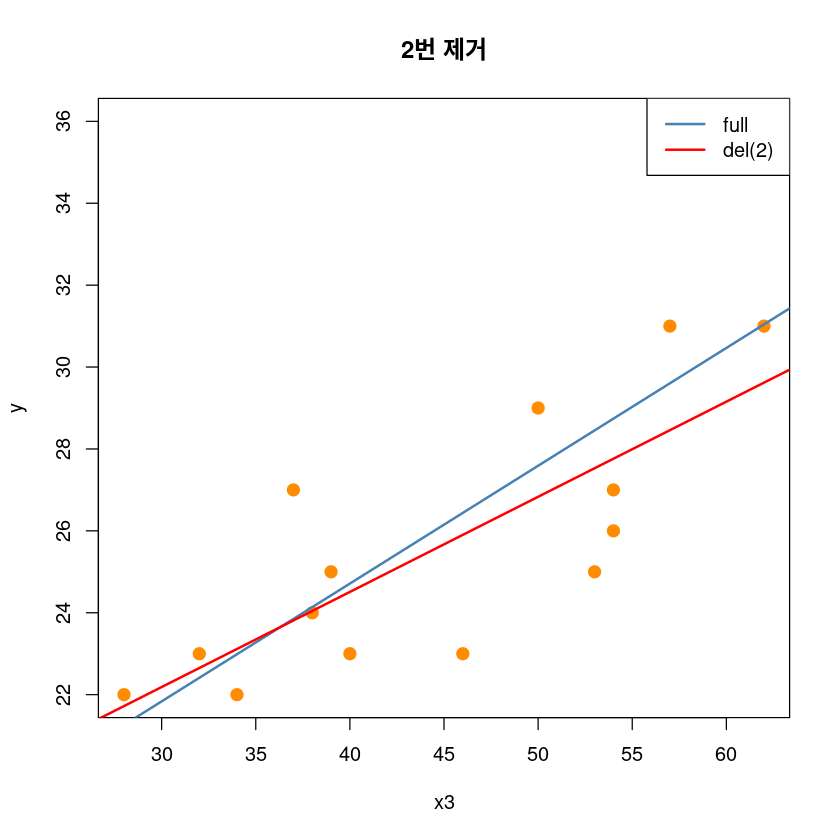

In [93]:
## 2제거 전후
plot(y~x3, dt,pch = 20,
 cex = 2,col = "darkorange",
 main = "2번 제거")
abline(model1, col='steelblue', lwd=2)
abline(lm(y~x3, dt[-2,]), col='red', lwd=2)
text(dt[2,], pos=2, "2")
legend('topright', legend=c("full", "del(2)"),
 col=c('steelblue', 'red'), lty=1, lwd=2)
# high leverage and high influence, not outlier

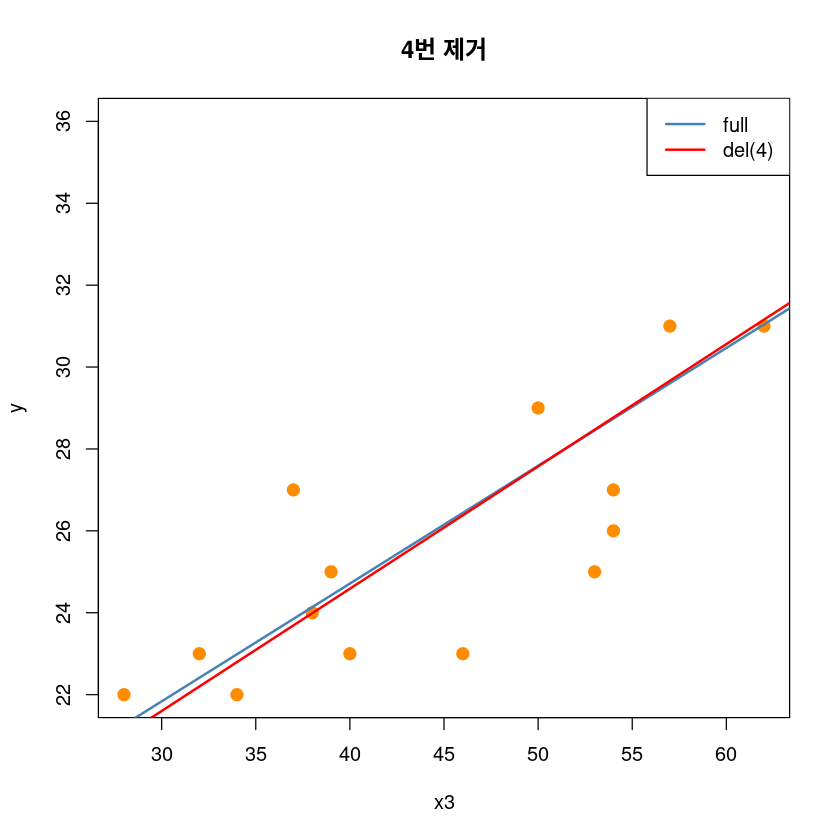

In [171]:
## 4제거 전후
plot(y~x3, dt,pch = 20,
 cex = 2,col = "darkorange",
 main = "4번 제거")
abline(model1, col='steelblue', lwd=2)
abline(lm(y~x3, dt[-4,]), col='red', lwd=2)
text(dt[-4,], pos=2, "2")
legend('topright', legend=c("full", "del(4)"),
 col=c('steelblue', 'red'), lty=1, lwd=2)
# high leverage and high influence, not outlier

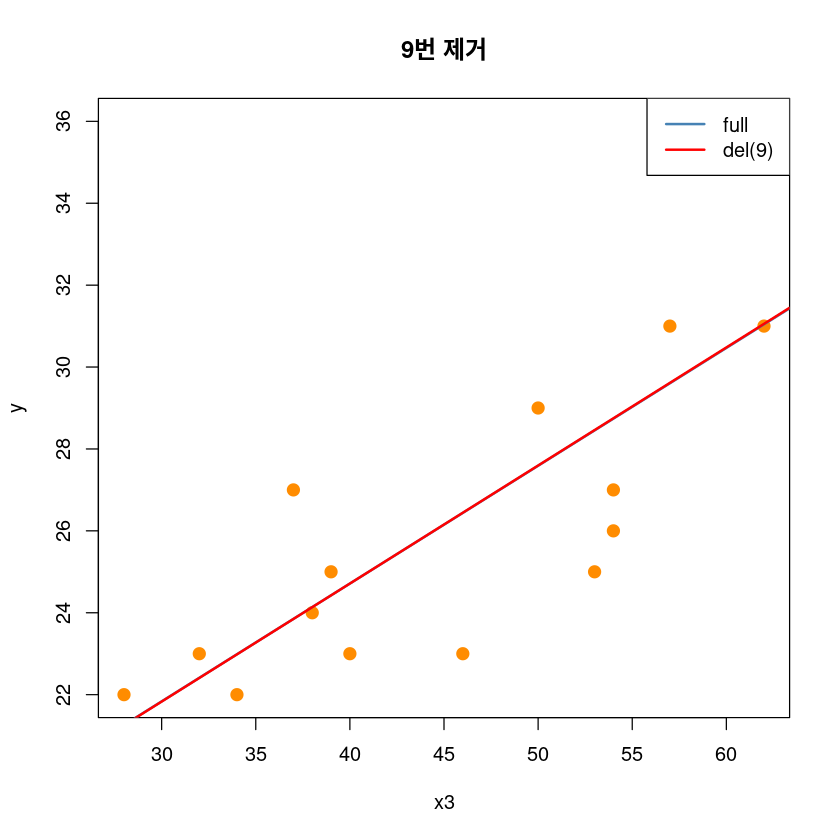

In [173]:
## 9제거 전후
plot(y~x3, dt,pch = 20,
 cex = 2,col = "darkorange",
 main = "9번 제거")
abline(model1, col='steelblue', lwd=2)
abline(lm(y~x3, dt[-9,]), col='red', lwd=2)
legend('topright', legend=c("full", "del(9)"),
 col=c('steelblue', 'red'), lty=1, lwd=2)
# high leverage and high influence, not outlier

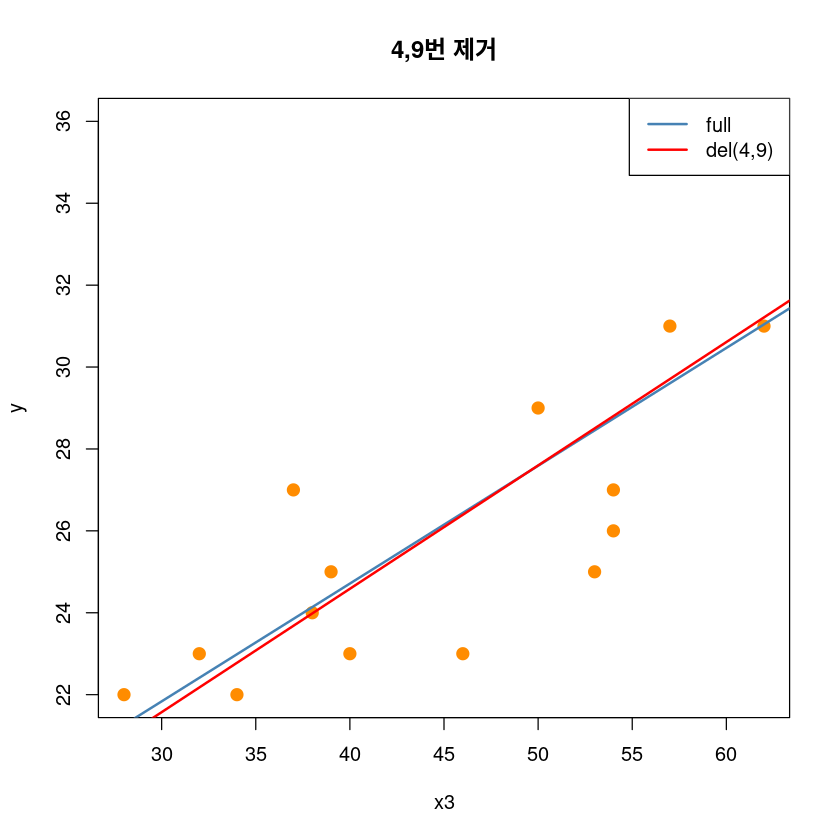

In [174]:
## 4,9제거 전후
plot(y~x3, dt,pch = 20,
 cex = 2,col = "darkorange",
 main = "4,9번 제거")
abline(model1, col='steelblue', lwd=2)
abline(lm(y~x3, dt[-c(4,9),]), col='red', lwd=2)
legend('topright', legend=c("full", "del(4,9)"),
 col=c('steelblue', 'red'), lty=1, lwd=2)
# high leverage and high influence, not outlier

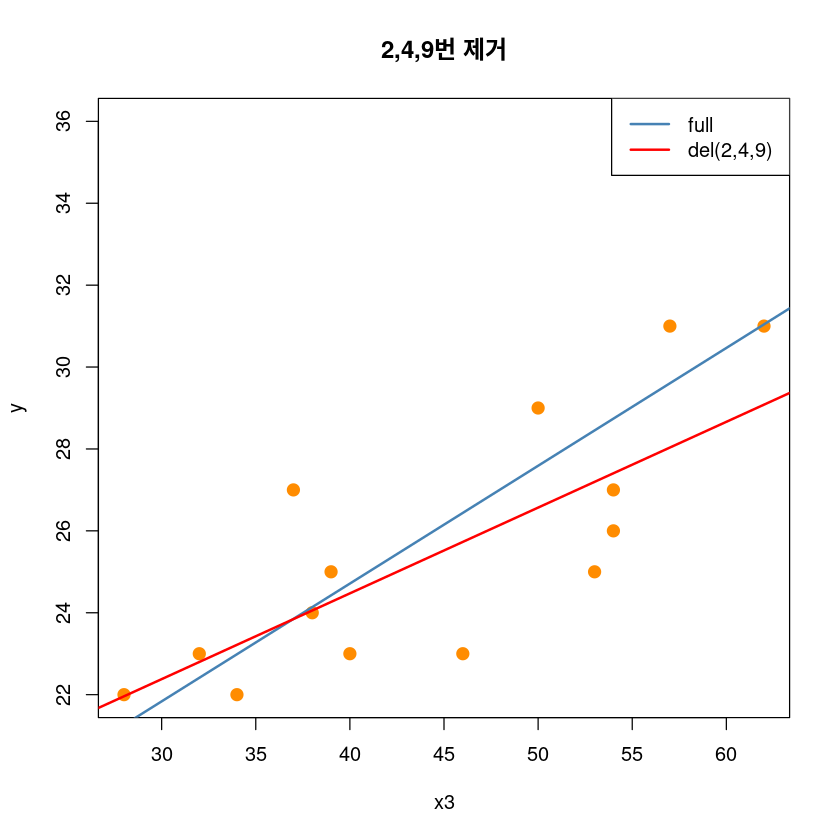

In [175]:
## 2,4,9제거 전후
plot(y~x3, dt,pch = 20,
 cex = 2,col = "darkorange",
 main = "2,4,9번 제거")
abline(model1, col='steelblue', lwd=2)
abline(lm(y~x3, dt[-c(2,4,9),]), col='red', lwd=2)
legend('topright', legend=c("full", "del(2,4,9)"),
 col=c('steelblue', 'red'), lty=1, lwd=2)
# high leverage and high influence, not outlier

### 정규성

In [64]:
shapiro.test(model1$residuals)


	Shapiro-Wilk normality test

data:  model1$residuals
W = 0.93332, p-value = 0.3057


### 회귀진단 그림

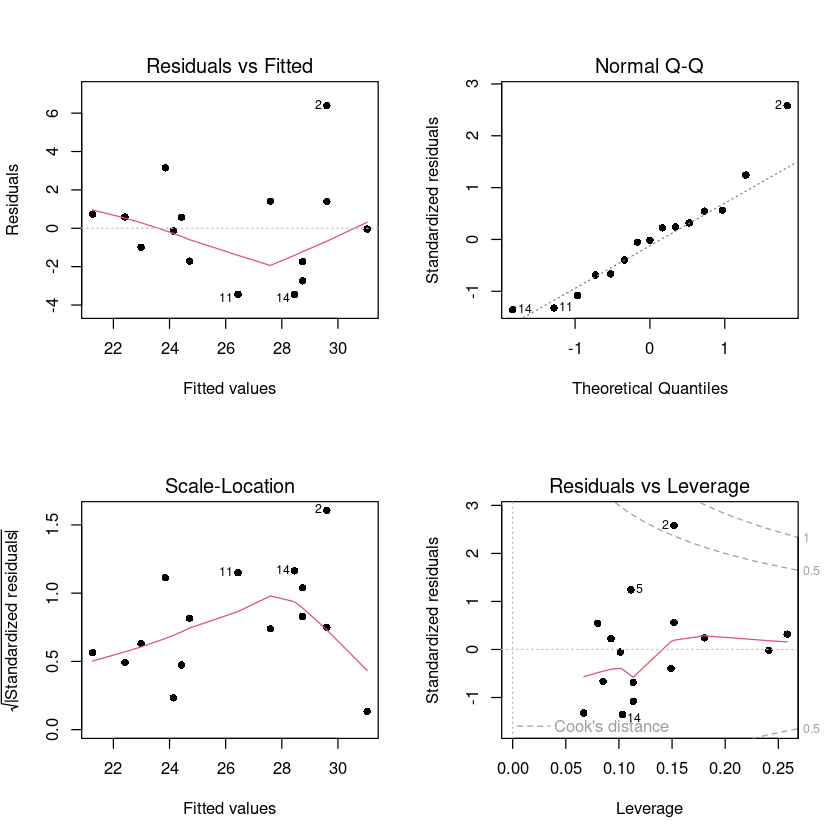

In [159]:

par(mfrow = c(2, 2))
plot(model1, pch=16)

## (2)

$x_1, x_2, x_3$ 를 모두 사용하여 $y$에 대한 중회귀모형을 적합시키고, 이상치의 존재유무와 영향을 크게 주는
측정값이 어떤 것인가를 판정하시오.


In [143]:
model2 <- lm(y~x1+x2+x3,dt)
summary(model2)


Call:
lm(formula = y ~ x1 + x2 + x3, data = dt)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0723 -1.0869 -0.0208  0.9365  3.8745 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) -15.78431   14.50462  -1.088   0.2998  
x1            0.15684    0.11331   1.384   0.1937  
x2            0.19620    0.10215   1.921   0.0811 .
x3            0.12948    0.09083   1.425   0.1818  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.331 on 11 degrees of freedom
Multiple R-squared:  0.7342,	Adjusted R-squared:  0.6617 
F-statistic: 10.13 on 3 and 11 DF,  p-value: 0.001699


### leverage

In [145]:
which.max(hatvalues(model2))
hatvalues(model2)[which.max(hatvalues(model2))]

6 
6

6 
0.4671112

In [146]:
2*(3+1)/nrow(dt)

[1] 0.5333333

- leverage 고려할 포인트는 업사.

### 이상치

- 잔차

1          2          3          4          5          6 
 0.3452149  3.8745225 -2.6447909 -0.3693592  1.0727144  0.8002931

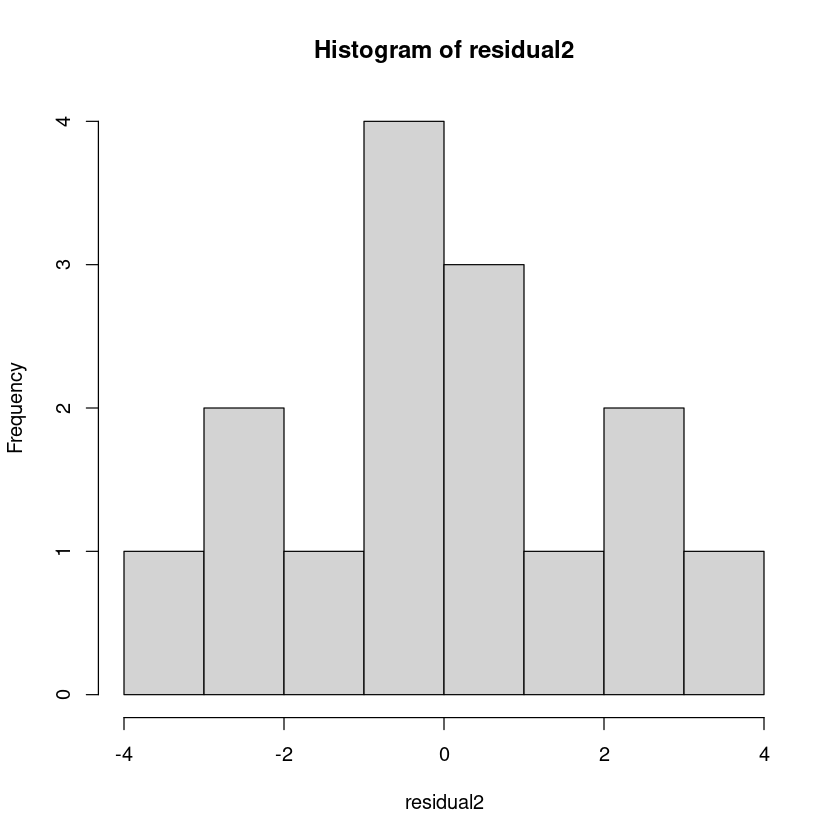

In [148]:
residual2 <- model2$residuals
head(residual2)
hist(residual2)

- 내적표준화된 잔차

1          2          3          4          5          6 
 0.1686938  2.0404096 -1.3684622 -0.1920386  0.5274630  0.4702524

1     2     3     4     5     6     7     8     9    10    11    12    13 
FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
   14    15 
FALSE FALSE

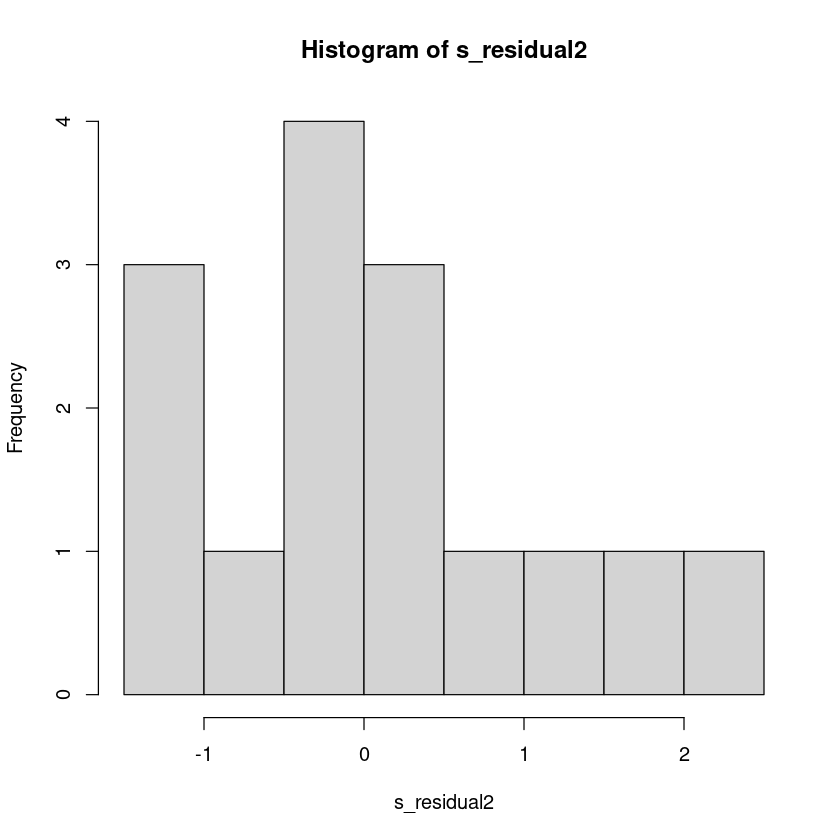

In [176]:
s_residual2 <- rstandard(model2)
head(s_residual2)
s_residual>2
hist(s_residual2)

- 외적표준화된 잔차

1          2          3          4          5          6 
 0.1610517  2.4677047 -1.4323903 -0.1834093  0.5093995  0.4529441

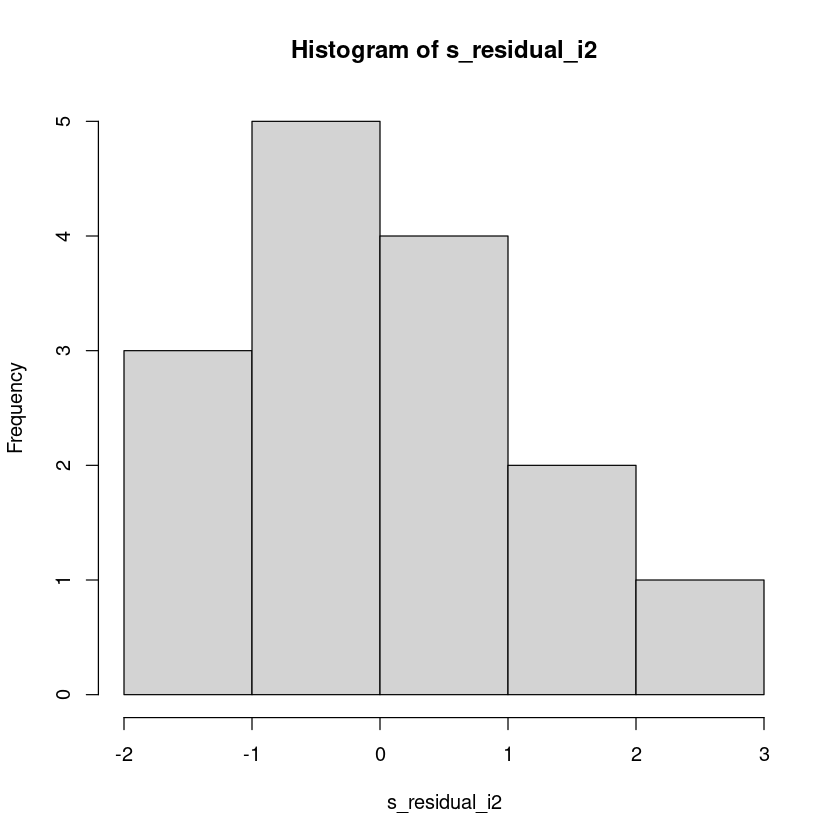

In [150]:
s_residual_i2 <- rstudent(model2)
head(s_residual_i2)
hist(s_residual_i2)

In [151]:
which.max(s_residual_i2)
s_residual_i[which.max(s_residual_i2)]

2 
2

2 
3.54825

In [152]:
qt(0.975, 15-3-2)

[1] 2.228139

- $|r_i^*| \geq t_{\alpha/2}(10)$ 이므로 2번째 관측값은 유의수준 0.05에서 이상점이다.

### 영향점

In [99]:
influence(model2)

,(Intercept),x1,x2,x3
1,0.95354693,0.0003764930,-5.561428e-03,-0.0014501180
2,-13.93952031,0.0672978312,8.377466e-02,-0.0248399264
3,4.69552573,-0.0704991936,-3.644734e-02,0.0705780525
4,0.50943934,0.0007684142,-5.873357e-03,0.0076533361
5,-2.27767961,0.0105499531,1.862708e-02,-0.0200833113
6,-4.18168476,-0.0332209276,3.130321e-02,0.0117532167
7,-2.20897093,0.0037053698,1.765648e-02,-0.0175478830
8,-0.01539851,0.0005690967,2.732094e-05,-0.0002319326
9,-0.51557236,-0.0263081084,9.369868e-03,-0.0028197702
10,0.12758711,0.0019405994,-7.974601e-04,-0.0013464759


In [100]:
influence.measures(model2)

Influence measures of
	 lm(formula = y ~ x1 + x2 + x3, data = dt) :

     dfb.1_    dfb.x1    dfb.x2   dfb.x3    dffit cov.r   cook.d    hat inf
1   0.06276  0.003172 -0.051979 -0.01524  0.08789 1.881 2.12e-03 0.2295    
2  -1.16230  0.718336  0.991882 -0.33074  1.75761 0.329 5.28e-01 0.3366   *
3   0.33885 -0.651274 -0.373479  0.81332 -0.96627 1.010 2.13e-01 0.3127    
4   0.03354  0.006477 -0.054915  0.08047 -0.12563 2.122 4.33e-03 0.3194   *
5  -0.15165  0.089922  0.176110 -0.21353  0.28547 1.737 2.18e-02 0.2390    
6  -0.27769 -0.282407  0.295171  0.12463  0.42407 2.533 4.85e-02 0.4671   *
7  -0.14811  0.031804  0.168104 -0.18788 -0.29442 1.518 2.29e-02 0.1767    
8  -0.00101  0.004789  0.000255 -0.00243 -0.00592 1.984 9.62e-06 0.2622    
9  -0.03420 -0.223389  0.088252 -0.02987 -0.35865 2.325 3.47e-02 0.4141   *
10  0.00839  0.016332 -0.007445 -0.01414  0.02405 1.807 1.59e-04 0.1906    
11 -0.12753 -0.009197  0.117770 -0.05558 -0.40259 0.748 3.70e-02 0.0732    
12 -0.05727 -0.0008

- DFFITS

In [101]:
dffits(model2) 

1            2            3            4            5            6 
 0.087892379  1.757610701 -0.966268918 -0.125631055  0.285472714  0.424068881 
           7            8            9           10           11           12 
-0.294419313 -0.005915653 -0.358654177  0.024046554 -0.402594901 -0.111997181 
          13           14           15 
 0.646673748 -0.846036928  1.256574619

In [102]:
which(abs(dffits(model2)) > 2*sqrt(2/(15-3-1)))

2  3 15 
 2  3 15

- Cook's distance

In [103]:
cooks.distance(model2)

1            2            3            4            5            6 
2.118898e-03 5.279998e-01 2.130487e-01 4.325818e-03 2.184420e-02 4.846026e-02 
           7            8            9           10           11           12 
2.291221e-02 9.623517e-06 3.474168e-02 1.589761e-04 3.698010e-02 3.429096e-03 
          13           14           15 
9.829061e-02 1.607779e-01 3.406789e-01

In [155]:
qf(0.5,3+1,15-3-1)

[1] 0.893157

In [156]:
which(cooks.distance(model2) >qf(0.5,4,11))

named integer(0)

없다

- covratio

In [119]:
covratio(model2)

1         2         3         4         5         6         7         8 
1.8805694 0.3292995 1.0098428 2.1223431 1.7365333 2.5331163 1.5177705 1.9843334 
        9        10        11        12        13        14        15 
2.3248783 1.8069906 0.7484534 1.7324061 0.9734517 0.8596426 0.8738053

In [108]:
which(abs(covratio(model2)-1) > 3*(3+1)/15)

1  4  6  8  9 10 
 1  4  6  8  9 10

### 정규성

In [67]:
shapiro.test(model2$residuals)


	Shapiro-Wilk normality test

data:  model2$residuals
W = 0.95818, p-value = 0.6608


### 회귀진단 그림

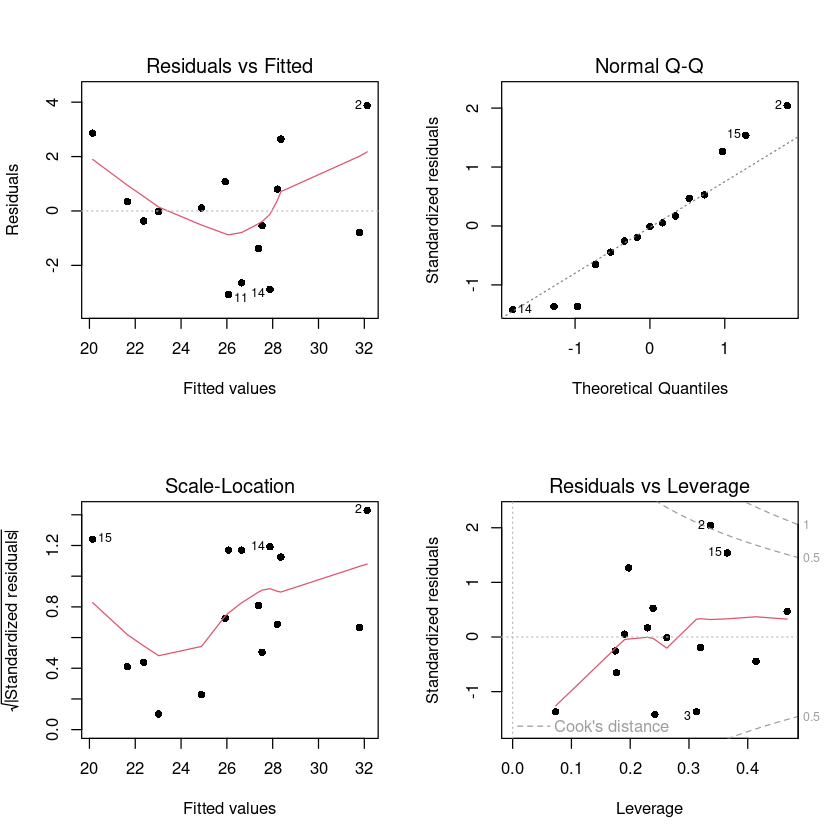

In [177]:
par(mfrow = c(2, 2))
plot(model2, pch=16)

# 2번

어떤 화학공장에서 $NH_3$를 $HNO_3$로 산화시키는 공정을 가지고 있다. 이 산화공정에 미치는 중요한 요인으로 생각되어지는 변수는

$x_1$ = 작업속도

$x_2$ = 냉각수의 온도

$x_3$ = 흡수액 속의 $HNO_3$의 농도

이다. $y$는 $NH_3$를 $HNO_3$로 바꿀 때 손실되는 $NH_3$의 %로 잡아주었다. 21일간의 공정기간 중에 얻은 자료는 앞의 것과 같다.


|실험번호|$x_1$|$x_2$|$x_3$|$y$|
|--|--|--|--|--|
|1|80|27|89|42|
|2|80|27|88|37|
|3|75|25|90|37|
|4|62|24|87|28|
|5|62|22|87|18|
|6|62|23|87|18|
|7|62|24|93|19|
|8|62|24|93|20|
|9|58|23|87|15|
|10|58|18|90|14|
|11|58|18|89|14|
|12|58|17|88|13|
|13|58|18|82|11|
|14|58|19|93|12|
|15|50|18|89|8|
|16|50|18|86|7|
|17|50|19|72|8|
|18|50|19|79|8|
|19|50|20|80|9|
|20|56|20|82|15|
|21|70|20|91|15|


In [290]:
dt2 <- data.frame(x1 = c(80,80,75,62,62,62,62,62,58,58,58,58,58,58,50,50,50,50,50,56,70),
                 x2 = c(27,27,25,24,22,23,24,24,23,18,18,17,18,19,18,18,19,19,20,20,20),
                 x3 = c(89,88,90,87,87,87,93,93,87,90,89,88,82,93,89,86,72,79,80,82,91),
 y = c(42,37,37,28,18,18,19,20,15,14,14,13,11,12,8,7,8,8,9,15,15))



## (1)

중회귀모형 

$y_i = β_0 + β_1x_{i1} + β_2x_{i2} + β_3x_{i3} + ϵ_i$

$i = 1, 2, · · · , 21$

$ϵ_i $∼$N(0, σ^2_ϵ)$

이 데이터간의 관계를 설명하는 데 충분하다고 가정하고 다음의 물음에 답하시오. 유의수준 α = 0.05를 사용하여라.


,x1,x2,x3,y
x1,1.0000000,0.7818523,0.4885669,0.9196635
x2,0.7818523,1.0000000,0.3078454,0.8755044
x3,0.4885669,0.3078454,1.0000000,0.3776617
y,0.9196635,0.8755044,0.3776617,1.0000000


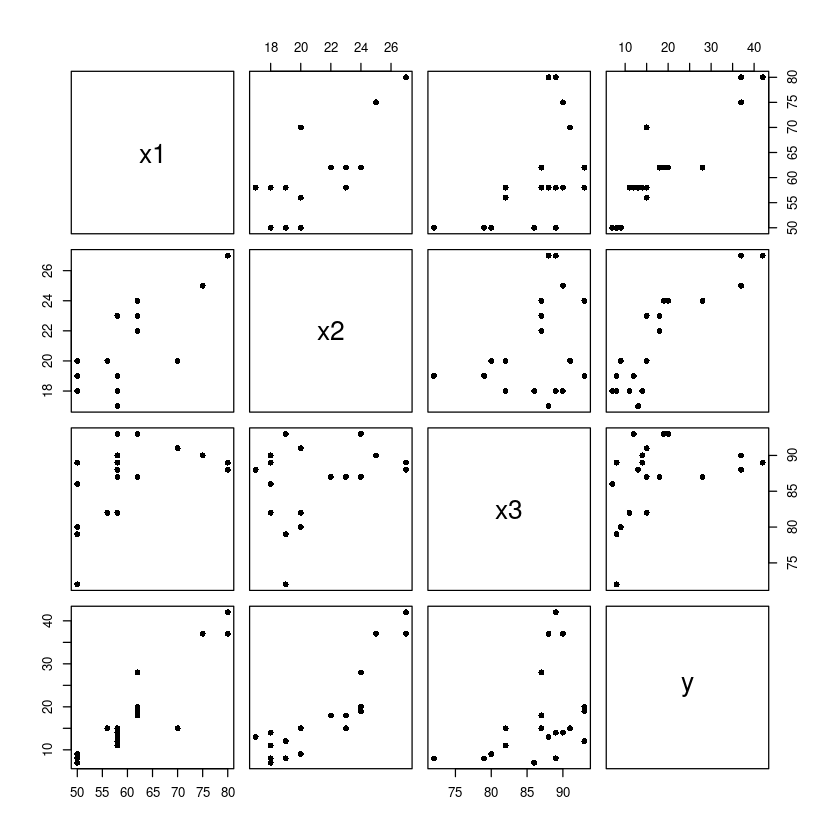

In [291]:
pairs(dt2, pch=16)
cor(dt2)

- y와 x1의 상관관계가 높아보인다. y와 x2도 높아보이낟.

- x1과 x2도 높다!!

In [292]:
m <- lm(y~., dt2) ##FM
summary(m)


Call:
lm(formula = y ~ ., data = dt2)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.4829 -1.7449 -0.4688  2.3497  5.7224 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -42.5557    12.7798  -3.330 0.003965 ** 
x1            0.7107     0.1416   5.018 0.000106 ***
x2            1.2610     0.3768   3.347 0.003823 ** 
x3           -0.1092     0.1632  -0.669 0.512537    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.289 on 17 degrees of freedom
Multiple R-squared:  0.9111,	Adjusted R-squared:  0.8954 
F-statistic: 58.08 on 3 and 17 DF,  p-value: 3.83e-09


### (a)

add1/drop1 함수를 이용하여, 부분F검정통계량 값을 통한 후진제거법을 시행하여 가장 적절한
회귀모형을 구하여라.

In [293]:
drop1(m,test="F")

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,183.9537,53.57340,NA,NA
x1,1,272.464536,456.4183,70.65663,25.1796878,0.0001055439
x2,1,121.206721,305.1604,62.20262,11.2012647,0.0038231136
x3,1,4.841619,188.7953,52.11896,0.4474361,0.5125370733


In [294]:
qf(0.95,1,21-3-1)

[1] 4.451322

$F_L < F_{\alpha B}$ 이므로 설명변수 x3제거

In [295]:
m1 <- update(m, ~ . -x3)
summary(m1)


Call:
lm(formula = y ~ x1 + x2, data = dt2)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.5290 -1.7505  0.1894  2.1156  5.6588 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -50.3588     5.1383  -9.801 1.22e-08 ***
x1            0.6712     0.1267   5.298 4.90e-05 ***
x2            1.2954     0.3675   3.525  0.00242 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.239 on 18 degrees of freedom
Multiple R-squared:  0.9088,	Adjusted R-squared:  0.8986 
F-statistic: 89.64 on 2 and 18 DF,  p-value: 4.382e-10


- pvalue의 값도 유의하고 $R^2$도 약 90%의 설명력을 가진다. 각각의 회귀계수도 유의하다.

- $y=-50.3588 + 0.6712 x_1 + 1.2954 x_2$

In [296]:
drop1(m1, test = "F")

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,188.7953,52.11896,NA,NA
x1,1,294.3553,483.1506,69.85193,28.06423,0.0000489797
x2,1,130.3208,319.1161,61.14168,12.42496,0.0024191459


In [297]:
qf(0.95,1,21-2-1)

[1] 4.413873

- F-value값이 작은 x2를 제거하려고 봤더니 pr값이 0.002419로 유의하므로 제거하지 않는다.

### (b)

add1/drop1 함수를 이용하여, 부분F검정통계량 값을 통한 전진선택법을 시행하여 가장 적절한
회귀모형을 구하여라.

In [298]:
m0 = lm(y ~ 1, data = dt2)
add1(m0, scope = y ~ x1 + x2 + x3, test = "F")

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,2069.2381,98.39868,NA,NA
x1,1,1750.1220,319.1161,61.14168,104.201315,3.774296e-09
x2,1,1586.0875,483.1506,69.85193,62.373224,2.028017e-07
x3,1,295.1321,1774.1060,97.16712,3.160752,9.143800e-02


- F값이 큰 x1을 추가하자. 심지어 유의하당

In [299]:
qf(0.95,1,21-1-1)

[1] 4.38075

In [300]:
m1 <- update(m0, ~.+x1)
summary(m1)


Call:
lm(formula = y ~ x1, data = dt2)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.2896  -1.1272  -0.0459   1.1166   8.8728 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -44.13202    6.10586  -7.228 7.31e-07 ***
x1            1.02031    0.09995  10.208 3.77e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.098 on 19 degrees of freedom
Multiple R-squared:  0.8458,	Adjusted R-squared:  0.8377 
F-statistic: 104.2 on 1 and 19 DF,  p-value: 3.774e-09


In [301]:
add1(m1,
 scope = y ~ x1 + x2 + x3,
 test = "F")

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,319.1161,61.14168,NA,NA
x2,1,130.32077,188.7953,52.11896,12.4249569,0.002419146
x3,1,13.95567,305.1604,62.20262,0.8231803,0.376238733


- x2의 Fvalue가 크고 유의하므로 추가하자.

In [302]:
m2 <- update(m1, ~ . +x2)
summary(m2)


Call:
lm(formula = y ~ x1 + x2, data = dt2)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.5290 -1.7505  0.1894  2.1156  5.6588 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -50.3588     5.1383  -9.801 1.22e-08 ***
x1            0.6712     0.1267   5.298 4.90e-05 ***
x2            1.2954     0.3675   3.525  0.00242 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.239 on 18 degrees of freedom
Multiple R-squared:  0.9088,	Adjusted R-squared:  0.8986 
F-statistic: 89.64 on 2 and 18 DF,  p-value: 4.382e-10


In [303]:
add1(m2,
 scope = y ~ x1 + x2 + x3,
 test = "F") 

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,188.7953,52.11896,NA,NA
x3,1,4.841619,183.9537,53.57340,0.4474361,0.5125371


- x3의 pr값도 유의수준 0.05에서 유의하지 않다. 모형에 포함될 수 없으므로 멈춘다. 최종모형은 x1과 x2를 포함한 모형이다.

### (c)

add1/drop1 함수를 이용하여, 부분F검정통계량 값을 통한 단계적 전진선택법을 시행하여 가장
적절한 회귀모형을 구하여라.

In [304]:
m0 = lm(y ~ 1, data = dt2)

In [305]:
add1(m0,
 scope = y ~ x1 + x2 + x3,
 test = "F") 

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,2069.2381,98.39868,NA,NA
x1,1,1750.1220,319.1161,61.14168,104.201315,3.774296e-09
x2,1,1586.0875,483.1506,69.85193,62.373224,2.028017e-07
x3,1,295.1321,1774.1060,97.16712,3.160752,9.143800e-02


- Fvalue가 크고 pr값이 유의하 x1을 추가하자.

In [306]:
m1 <- update(m0, ~ . +x1)
summary(m1)


Call:
lm(formula = y ~ x1, data = dt2)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.2896  -1.1272  -0.0459   1.1166   8.8728 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -44.13202    6.10586  -7.228 7.31e-07 ***
x1            1.02031    0.09995  10.208 3.77e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.098 on 19 degrees of freedom
Multiple R-squared:  0.8458,	Adjusted R-squared:  0.8377 
F-statistic: 104.2 on 1 and 19 DF,  p-value: 3.774e-09


In [307]:
add1(m1,
 scope = y ~ x1 + x2 + x3,
 test = "F") 

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,319.1161,61.14168,NA,NA
x2,1,130.32077,188.7953,52.11896,12.4249569,0.002419146
x3,1,13.95567,305.1604,62.20262,0.8231803,0.376238733


- x2의 Fvalue가 더 크고 pr값이 유의하므로 x2선택

In [308]:
m2 <- update(m1, ~ . +x2)

- x1이 있는 모형에 x2를 추가함

In [309]:
drop1(m2, test = "F")

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,188.7953,52.11896,NA,NA
x1,1,294.3553,483.1506,69.85193,28.06423,0.0000489797
x2,1,130.3208,319.1161,61.14168,12.42496,0.0024191459


- x1을 보자. 제거할까? 유의하므로 제거하지 말자.

In [310]:
add1(m2,
 scope = y ~ x1 + x2 + x3,
 test = "F")

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,188.7953,52.11896,NA,NA
x3,1,4.841619,183.9537,53.57340,0.4474361,0.5125371


- 유의수준 0.05에서는 유의하지 않으므로 x3를 추가하지 않는다.

In [311]:
summary(m2)


Call:
lm(formula = y ~ x1 + x2, data = dt2)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.5290 -1.7505  0.1894  2.1156  5.6588 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -50.3588     5.1383  -9.801 1.22e-08 ***
x1            0.6712     0.1267   5.298 4.90e-05 ***
x2            1.2954     0.3675   3.525  0.00242 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.239 on 18 degrees of freedom
Multiple R-squared:  0.9088,	Adjusted R-squared:  0.8986 
F-statistic: 89.64 on 2 and 18 DF,  p-value: 4.382e-10


## (2)

leaps 패키지의 regsubsets 함수를 이용하여, 다음의 물음에 답하여라.

In [312]:
library(leaps)

### (a)

전역탐색법을 사용하여, 가능한 모든 회귀모형에 대하여 $MSE_p, R^2_p, R^2_{adj,p}, C_p$ 를 구하여라. (regsubsets 사용시, 옵션에서 nbest=1 대신에 적당한 숫자를 입력하면 모든 회귀모형에 대한 결과를
확인할 수 있다.)


In [313]:
fit<-regsubsets(y~., data=dt2, nbest=6,
method='exhaustive',
)
summary(fit)
with(summary(fit),
     round(cbind(which,rss,rsq,adjr2,cp,bic),3))

Subset selection object
Call: regsubsets.formula(y ~ ., data = dt2, nbest = 6, method = "exhaustive", 
    )
3 Variables  (and intercept)
   Forced in Forced out
x1     FALSE      FALSE
x2     FALSE      FALSE
x3     FALSE      FALSE
6 subsets of each size up to 3
Selection Algorithm: exhaustive
         x1  x2  x3 
1  ( 1 ) "*" " " " "
1  ( 2 ) " " "*" " "
1  ( 3 ) " " " " "*"
2  ( 1 ) "*" "*" " "
2  ( 2 ) "*" " " "*"
2  ( 3 ) " " "*" "*"
3  ( 1 ) "*" "*" "*"

,(Intercept),x1,x2,x3,rss,rsq,adjr2,cp,bic
1,1,1,0,0,319.116,0.846,0.838,12.491,-33.168
1,1,0,1,0,483.151,0.767,0.754,27.650,-24.458
1,1,0,0,1,1774.106,0.143,0.098,146.953,2.857
2,1,1,1,0,188.795,0.909,0.899,2.447,-41.146
2,1,1,0,1,305.160,0.853,0.836,13.201,-31.062
2,1,0,1,1,456.418,0.779,0.755,27.180,-22.608
3,1,1,1,1,183.954,0.911,0.895,4.000,-38.647


### (b)

$p = 1, p = 2, p = 3$에서 각각 가장 적절한 회귀모형을 구하여라. (기준 : $R^2_p$)

p=1인 경우에 $R_2$ 값이 가장 큰(0.846) 모형을 선택한다. 즉 $y=\beta_0+\beta_1x_1$

p=2인 경우에는 $y=\beta_0+\beta_1x_1+\beta_2x_2$

p=3인 경우에는 $y=\beta_0+\beta_1x_1+\beta_2x_2+\beta_3x_3$

In [314]:
fit<-regsubsets(y~., data=dt2, nbest=1,
method='exhaustive',
)
summary(fit)
with(summary(fit),
     round(cbind(which,rss,rsq,adjr2,cp,bic),3))

Subset selection object
Call: regsubsets.formula(y ~ ., data = dt2, nbest = 1, method = "exhaustive", 
    )
3 Variables  (and intercept)
   Forced in Forced out
x1     FALSE      FALSE
x2     FALSE      FALSE
x3     FALSE      FALSE
1 subsets of each size up to 3
Selection Algorithm: exhaustive
         x1  x2  x3 
1  ( 1 ) "*" " " " "
2  ( 1 ) "*" "*" " "
3  ( 1 ) "*" "*" "*"

,(Intercept),x1,x2,x3,rss,rsq,adjr2,cp,bic
1,1,1,0,0,319.116,0.846,0.838,12.491,-33.168
2,1,1,1,0,188.795,0.909,0.899,2.447,-41.146
3,1,1,1,1,183.954,0.911,0.895,4.000,-38.647


### (c)

위에서 구한 모형 중 가장 적절한 회귀모형을 선택하여라.

adjr이 제일 높은 모형-> y=x1+x2

rss는 작은것이 제일 좋은데 3개를 선택한 모형은 원래 제일 작음.. x1 1개만 선택한 모형의 rss는 319이고 x1과 x2를 선택한 모형의 rss는 188로 급격히 감소함. x3까ㅣ 추가한것은 183으로 별차이가 없으므로 x1+x2를 선택한 모형을 고르는 것이 좋아보인다. bic값도 제일 낮음 


### (d)

$C_p$의 경우 $C_p ≤ p + 1$ 이면 좋은 모형으로 판정하고, 이를 만족할 때 변수의 수가 가장 적은 모형을 선택하는 것이 좋다고 알려져 있다. $C_p$ 를 이용했을 때, $p = 1, p = 2, p = 3$에서 각각 가장 좋은
모형을 선택하여라.

p=1일때는 x1선택한 모형이 제일작지만, cp>2이므로 좋은 모형이 아니다.

p=2일때는 x1+x2

p=3일때는 x1+x2+x3

In [315]:
fit<-regsubsets(y~., data=dt2, nbest=6,
method='exhaustive',
)
summary(fit)
with(summary(fit),
     round(cbind(which,rss,rsq,adjr2,cp,bic),3))

Subset selection object
Call: regsubsets.formula(y ~ ., data = dt2, nbest = 6, method = "exhaustive", 
    )
3 Variables  (and intercept)
   Forced in Forced out
x1     FALSE      FALSE
x2     FALSE      FALSE
x3     FALSE      FALSE
6 subsets of each size up to 3
Selection Algorithm: exhaustive
         x1  x2  x3 
1  ( 1 ) "*" " " " "
1  ( 2 ) " " "*" " "
1  ( 3 ) " " " " "*"
2  ( 1 ) "*" "*" " "
2  ( 2 ) "*" " " "*"
2  ( 3 ) " " "*" "*"
3  ( 1 ) "*" "*" "*"

,(Intercept),x1,x2,x3,rss,rsq,adjr2,cp,bic
1,1,1,0,0,319.116,0.846,0.838,12.491,-33.168
1,1,0,1,0,483.151,0.767,0.754,27.650,-24.458
1,1,0,0,1,1774.106,0.143,0.098,146.953,2.857
2,1,1,1,0,188.795,0.909,0.899,2.447,-41.146
2,1,1,0,1,305.160,0.853,0.836,13.201,-31.062
2,1,0,1,1,456.418,0.779,0.755,27.180,-22.608
3,1,1,1,1,183.954,0.911,0.895,4.000,-38.647


### (e)

위에서 선택한 모형 중 $C_p$를 기준으로 가장 적절한 회귀모형을 선택하여라

p=2일때 x1+x2를 선택한 모형이 가장 적절하다. p=1인 경우에는 cp<p+1이므로 좋은 모형이라고 할 수 없다.

## (3)

일차 선형항(lenear terms)만으로는 충분하지 않다고 생각하고 이차다항회귀모형

$y = β_0 + β_1x_1 + β_2x_2 + β_3x_3 + β_4x^2_1 + β_5x^2_2 + β_6x^2_3 + β_7x_1x_2 + β_8x_1x_3 + β_9x_2x_3 + ϵ$을 가정하였다. 다음 물음에 답하여라.


In [316]:
dt2$x_1 <- dt2$x1^2
dt2$x_2 <- dt2$x2^2
dt2$x_3 <- dt2$x3^2
dt2$x1x2 <- dt2$x1 * dt2$x2
dt2$x1x3 <- dt2$x1 * dt2$x1
dt2$x2x3 <- dt2$x2 * dt2$x3
head(dt2)

,x1,x2,x3,y,x_1,x_2,x_3,x1x2,x1x3,x2x3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,80,27,89,42,6400,729,7921,2160,6400,2403
2,80,27,88,37,6400,729,7744,2160,6400,2376
3,75,25,90,37,5625,625,8100,1875,5625,2250
4,62,24,87,28,3844,576,7569,1488,3844,2088
5,62,22,87,18,3844,484,7569,1364,3844,1914
6,62,23,87,18,3844,529,7569,1426,3844,2001


### (a)

변수간 상관계수를 구하여라.


In [317]:
cor(dt2)

,x1,x2,x3,y,x_1,x_2,x_3,x1x2,x1x3,x2x3
x1,1.0000000,0.7818523,0.4885669,0.9196635,0.9969709,0.8002266,0.4861833,0.9452829,0.9969709,0.8221139
x2,0.7818523,1.0000000,0.3078454,0.8755044,0.7846889,0.9982761,0.3079752,0.9377909,0.7846889,0.9542580
x3,0.4885669,0.3078454,1.0000000,0.3776617,0.4524089,0.3130881,0.9991718,0.4004805,0.4524089,0.5773637
y,0.9196635,0.8755044,0.3776617,1.0000000,0.9251379,0.8933751,0.3735385,0.9588371,0.9251379,0.8672805
x_1,0.9969709,0.7846889,0.4524089,0.9251379,1.0000000,0.8053207,0.4499860,0.9500453,1.0000000,0.8131868
x_2,0.8002266,0.9982761,0.3130881,0.8933751,0.8053207,1.0000000,0.3129003,0.9498899,0.8053207,0.9544366
x_3,0.4861833,0.3079752,0.9991718,0.3735385,0.4499860,0.3129003,1.0000000,0.3990206,0.4499860,0.5777549
x1x2,0.9452829,0.9377909,0.4004805,0.9588371,0.9500453,0.9498899,0.3990206,1.0000000,0.9500453,0.9290098
x1x3,0.9969709,0.7846889,0.4524089,0.9251379,1.0000000,0.8053207,0.4499860,0.9500453,1.0000000,0.8131868
x2x3,0.8221139,0.9542580,0.5773637,0.8672805,0.8131868,0.9544366,0.5777549,0.9290098,0.8131868,1.0000000


### (b)

설명변수 9개를 모두 사용한 완전모형(full model)에 대한 분산분석표를 작성하고, α = 0.05에서
선형회귀모형의 유의성을 검정하시오.

In [318]:
model3 <- lm(y~.,data=dt2)
summary(model3)


Call:
lm(formula = y ~ ., data = dt2)

Residuals:
   Min     1Q Median     3Q    Max 
-4.265 -1.249  0.005  1.177  5.382 

Coefficients: (1 not defined because of singularities)
              Estimate Std. Error t value Pr(>|t|)
(Intercept) -95.454579 171.941017  -0.555    0.589
x1            1.918799   1.503723   1.276    0.226
x2           -4.101841  10.326442  -0.397    0.698
x3            1.727460   3.273516   0.528    0.607
x_1          -0.040497   0.026368  -1.536    0.151
x_2          -0.007079   0.265375  -0.027    0.979
x_3          -0.004630   0.023903  -0.194    0.850
x1x2          0.172153   0.128263   1.342    0.204
x1x3                NA         NA      NA       NA
x2x3         -0.054589   0.112622  -0.485    0.637

Residual standard error: 3.037 on 12 degrees of freedom
Multiple R-squared:  0.9465,	Adjusted R-squared:  0.9109 
F-statistic: 26.55 on 8 and 12 DF,  p-value: 1.706e-06


In [319]:
anova(model3)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
x1,1,1750.121989,1750.121989,189.7977744,1.023932e-08
x2,1,130.320772,130.320772,14.1330676,2.723908e-03
x3,1,4.841619,4.841619,0.5250654,4.825789e-01
x_1,1,8.498097,8.498097,0.9216043,3.559986e-01
x_2,1,39.533776,39.533776,4.2873712,6.062395e-02
x_3,1,5.206534,5.206534,0.5646399,4.668786e-01
x1x2,1,17.897053,17.897053,1.9409052,1.888401e-01
x2x3,1,2.166462,2.166462,0.2349492,6.366054e-01
Residuals,12,110.651792,9.220983,NA,NA


In [320]:
null_model <- lm(y~1, data=dt2)  #H0
model3<- lm(y~., data=dt2)  #H1

anova(null_model, model3)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,20,2069.2381,NA,NA,NA,NA
2,12,110.6518,8,1958.586,26.55067,1.706475e-06


- F=26.55067

### (c)

상관계수들을 보고 변수를 하나만 선택할 때에는 어떤 변수가 선택될 것인지를 말하시오.


x1x3와 y의 상관계수가 0.9588371로 가장 높으므로 선택

### (d)

상관계수들을 보고 변수를 하나만 제거시키려고 할 때, 어떤 변수가 제거될 것인가를 말할 수 있는가?

x3^2와 y의 상관계수가 0.3735385로 가장 작으므로 제거

### (e)

add1/drop1 함수를 이용하여, $MSE_p$ 기준으로 단계적 전진선택법을 시행하여 가장 적절한 회귀모형을 구하여라.


In [321]:
model_step = step(
 m0,
 scope =y ~ x1 + x2 + x3+ I(x1^2)+I(x2^2)+I(x3^2)+I(x1*x2)+I(x1*x3)+I(x2*x3),
 direction = "both")
summary(model_step)

Start:  AIC=98.4
y ~ 1

             Df Sum of Sq     RSS    AIC
+ I(x1 * x2)  1   1902.39  166.85 47.523
+ I(x1^2)     1   1771.02  298.22 59.719
+ x1          1   1750.12  319.12 61.142
+ I(x2^2)     1   1651.50  417.74 66.797
+ x2          1   1586.09  483.15 69.852
+ I(x1 * x3)  1   1563.93  505.31 70.794
+ I(x2 * x3)  1   1556.43  512.81 71.103
+ x3          1    295.13 1774.11 97.167
+ I(x3^2)     1    288.72 1780.52 97.243
<none>                    2069.24 98.399

Step:  AIC=47.52
y ~ I(x1 * x2)

             Df Sum of Sq     RSS    AIC
<none>                     166.85 47.523
+ x2          1      9.63  157.22 48.275
+ I(x2 * x3)  1      8.34  158.51 48.447
+ I(x2^2)     1      6.42  160.42 48.699
+ I(x1^2)     1      4.28  162.56 48.977
+ x1          1      3.43  163.41 49.087
+ I(x1 * x3)  1      0.61  166.23 49.446
+ I(x3^2)     1      0.20  166.64 49.498
+ x3          1      0.10  166.75 49.511
- I(x1 * x2)  1   1902.39 2069.24 98.399



Call:
lm(formula = y ~ I(x1 * x2), data = dt2)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.1481 -2.3759 -0.6042  2.6123  5.6241 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -15.29308    2.32149  -6.588 2.64e-06 ***
I(x1 * x2)    0.02532    0.00172  14.719 7.68e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.963 on 19 degrees of freedom
Multiple R-squared:  0.9194,	Adjusted R-squared:  0.9151 
F-statistic: 216.6 on 1 and 19 DF,  p-value: 7.675e-12


- AIC로 확인해보니까 $y$~$I(x1*x2)$가 최종모형

In [322]:
m0 = lm(y ~ 1, data = dt2)
add1(m0,
 scope = y ~ x1 + x2 + x3+ I(x1^2)+I(x2^2)+I(x3^2)+I(x1*x2)+I(x1*x3)+I(x2*x3),
 test = "F") 

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,2069.2381,98.39868,NA,NA
x1,1,1750.1220,319.1161,61.14168,104.201315,3.774296e-09
x2,1,1586.0875,483.1506,69.85193,62.373224,2.028017e-07
x3,1,295.1321,1774.1060,97.16712,3.160752,9.143800e-02
I(x1^2),1,1771.0198,298.2182,59.71937,112.834735,1.972872e-09
I(x2^2),1,1651.4985,417.7396,66.79705,75.114902,5.001792e-08
I(x3^2),1,288.7229,1780.5152,97.24285,3.080982,9.532366e-02
I(x1 * x2),1,1902.3924,166.8457,47.52349,216.639964,7.675449e-12
I(x1 * x3),1,1563.9280,505.3101,70.79365,58.804744,3.124530e-07


In [323]:
qf(0.95,1,21-9-1)

[1] 4.844336

- RSS의 값이 가장 작은 x1*x2 변수를 선택

In [324]:
m1 <- update(m0, ~ . +I(x1*x2))
summary(m1)


Call:
lm(formula = y ~ I(x1 * x2), data = dt2)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.1481 -2.3759 -0.6042  2.6123  5.6241 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -15.29308    2.32149  -6.588 2.64e-06 ***
I(x1 * x2)    0.02532    0.00172  14.719 7.68e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.963 on 19 degrees of freedom
Multiple R-squared:  0.9194,	Adjusted R-squared:  0.9151 
F-statistic: 216.6 on 1 and 19 DF,  p-value: 7.675e-12


In [325]:
add1(m1, 
     scope = y ~ x1 + x2 + x3+ I(x1^2)+I(x2^2)+I(x3^2)+I(x1*x2)+I(x1*x3)+I(x2*x3),
 test = "F") 

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,166.8457,47.52349,NA,NA
x1,1,3.43425436,163.4115,49.08673,0.37828785,0.5462188
x2,1,9.62876230,157.2170,48.27519,1.10241098,0.3076309
x3,1,0.09886847,166.7469,49.51104,0.01067266,0.9188604
I(x1^2),1,4.28275838,162.5630,48.97740,0.47421406,0.4998351
I(x2^2),1,6.42241880,160.4233,48.69917,0.72061555,0.4070905
I(x3^2),1,0.20188867,166.6438,49.49807,0.02180696,0.8842434
I(x1 * x3),1,0.61479960,166.2309,49.44597,0.06657240,0.7993213
I(x2 * x3),1,8.33654778,158.5092,48.44709,0.94668239,0.3434600


In [326]:
qf(0.95,1,21-8-1)

[1] 4.747225

- X2의 RSS값이 157.2170으로 가장 낮지만 pr값이 유의하지 않으므로 선택하지 않는다.

### (f)

regsubsets 함수를 이용하여 전역탐색법을 시행하여라. $C_p, MSE_p, R^2_{adj,p}$ 기준으로 가장 적절한
모형을 선택한 후 위의 결과와 비교하시오

In [327]:
fit2 <- regsubsets(y~., data=dt2, nbest=20, method='exhaustive',)
summary(fit2)

Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
“1  linear dependencies found”


Reordering variables and trying again:


Subset selection object
Call: regsubsets.formula(y ~ ., data = dt2, nbest = 20, method = "exhaustive", 
    )
9 Variables  (and intercept)
     Forced in Forced out
x1       FALSE      FALSE
x2       FALSE      FALSE
x3       FALSE      FALSE
x_1      FALSE      FALSE
x_2      FALSE      FALSE
x_3      FALSE      FALSE
x1x2     FALSE      FALSE
x2x3     FALSE      FALSE
x1x3     FALSE      FALSE
20 subsets of each size up to 8
Selection Algorithm: exhaustive
          x1  x2  x3  x_1 x_2 x_3 x1x2 x1x3 x2x3
1  ( 1 )  " " " " " " " " " " " " "*"  " "  " " 
1  ( 2 )  " " " " " " " " " " " " " "  "*"  " " 
1  ( 3 )  " " " " " " "*" " " " " " "  " "  " " 
1  ( 4 )  "*" " " " " " " " " " " " "  " "  " " 
1  ( 5 )  " " " " " " " " "*" " " " "  " "  " " 
1  ( 6 )  " " "*" " " " " " " " " " "  " "  " " 
1  ( 7 )  " " " " " " " " " " " " " "  " "  "*" 
1  ( 8 )  " " " " "*" " " " " " " " "  " "  " " 
1  ( 9 )  " " " " " " " " " " "*" " "  " "  " " 
2  ( 1 )  " " "*" " " " " " " " " "*"  " "  " "

In [328]:
with(summary(fit2),
     round(cbind(which,rss,rsq,adjr2,cp,bic),3))

,(Intercept),x1,x2,x3,x_1,x_2,x_3,x1x2,x1x3,x2x3,rss,rsq,adjr2,cp,bic
1,1,0,0,0,0,0,0,1,0,0,166.846,0.919,0.915,-0.414,-46.786
1,1,0,0,0,0,0,0,0,1,0,298.218,0.856,0.848,12.646,-34.590
1,1,0,0,0,1,0,0,0,0,0,298.218,0.856,0.848,12.646,-34.590
1,1,1,0,0,0,0,0,0,0,0,319.116,0.846,0.838,14.724,-33.168
1,1,0,0,0,0,1,0,0,0,0,417.740,0.798,0.787,24.528,-27.513
1,1,0,1,0,0,0,0,0,0,0,483.151,0.767,0.754,31.030,-24.458
1,1,0,0,0,0,0,0,0,0,1,512.808,0.752,0.739,33.979,-23.207
1,1,0,0,1,0,0,0,0,0,0,1774.106,0.143,0.098,159.366,2.857
1,1,0,0,0,0,0,1,0,0,0,1780.515,0.140,0.094,160.003,2.933
2,1,0,1,0,0,0,0,1,0,0,157.217,0.924,0.916,0.629,-44.990


- cp기준으로는 x1x2를 선택한 변수 1개가 가장 적절하다.

In [333]:
fit3 <- regsubsets(y~., data=dt2, nbest=1, method='exhaustive',)
summary(fit3)
with(summary(fit3),
     round(cbind(which,rss,rsq,adjr2,cp,bic),3))

Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
“1  linear dependencies found”


Reordering variables and trying again:


Subset selection object
Call: regsubsets.formula(y ~ ., data = dt2, nbest = 1, method = "exhaustive", 
    )
9 Variables  (and intercept)
     Forced in Forced out
x1       FALSE      FALSE
x2       FALSE      FALSE
x3       FALSE      FALSE
x_1      FALSE      FALSE
x_2      FALSE      FALSE
x_3      FALSE      FALSE
x1x2     FALSE      FALSE
x2x3     FALSE      FALSE
x1x3     FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive
         x1  x2  x3  x_1 x_2 x_3 x1x2 x1x3 x2x3
1  ( 1 ) " " " " " " " " " " " " "*"  " "  " " 
2  ( 1 ) " " "*" " " " " " " " " "*"  " "  " " 
3  ( 1 ) " " "*" " " " " " " " " "*"  "*"  " " 
4  ( 1 ) "*" "*" " " " " " " " " "*"  "*"  " " 
5  ( 1 ) "*" " " "*" "*" " " " " "*"  " "  "*" 
6  ( 1 ) "*" "*" "*" "*" " " " " "*"  " "  "*" 
7  ( 1 ) "*" "*" "*" "*" " " "*" "*"  " "  "*" 
8  ( 1 ) "*" "*" "*" "*" "*" "*" "*"  " "  "*" 

,(Intercept),x1,x2,x3,x_1,x_2,x_3,x1x2,x1x3,x2x3,rss,rsq,adjr2,cp,bic
1,1,0,0,0,0,0,0,1,0,0,166.846,0.919,0.915,-0.414,-46.786
2,1,0,1,0,0,0,0,1,0,0,157.217,0.924,0.916,0.629,-44.990
3,1,0,1,0,0,0,0,1,1,0,132.668,0.936,0.925,0.189,-45.511
4,1,1,1,0,0,0,0,1,1,0,120.807,0.942,0.927,1.009,-44.433
5,1,1,0,1,1,0,0,1,0,1,112.246,0.946,0.928,2.158,-42.932
6,1,1,1,1,1,0,0,1,0,1,110.998,0.946,0.923,4.034,-40.122
7,1,1,1,1,1,0,1,1,0,1,110.658,0.947,0.918,6.001,-37.142
8,1,1,1,1,1,1,1,1,0,1,110.652,0.947,0.911,8.000,-34.099
